In [145]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation



#loading the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data
#assigning the attributes to the data
attributes =['state','county','community','communityname','fold','population','householdsize  ','racepctblack  ','racePctWhite  ','racePctAsian  ','racePctHisp  ','agePct12t21  ','agePct12t29  ','agePct16t24  ','agePct65up  ','numbUrban  ','pctUrban  ','medIncome  ','pctWWage  ','pctWFarmSelf  ','pctWInvInc  ','pctWSocSec  ','pctWPubAsst  ','pctWRetire  ','medFamInc  ','perCapInc  ','whitePerCap  ','blackPerCap  ','indianPerCap  ','AsianPerCap  ','OtherPerCap  ','HispPerCap  ','NumUnderPov  ','PctPopUnderPov  ','PctLess9thGrade  ','PctNotHSGrad  ','PctBSorMore  ','PctUnemployed  ','PctEmploy  ','PctEmplManu  ','PctEmplProfServ  ','PctOccupManu  ','PctOccupMgmtProf  ','MalePctDivorce  ','MalePctNevMarr  ','FemalePctDiv  ','TotalPctDiv  ','PersPerFam  ','PctFam2Par  ','PctKids2Par  ','PctYoungKids2Par  ','PctTeen2Par  ','PctWorkMomYoungKids  ','PctWorkMom  ','NumIlleg  ','PctIlleg  ','NumImmig  ','PctImmigRecent  ','PctImmigRec5  ','PctImmigRec8  ','PctImmigRec10  ','PctRecentImmig  ','PctRecImmig5  ','PctRecImmig8  ','PctRecImmig10  ','PctSpeakEnglOnly  ','PctNotSpeakEnglWell  ','PctLargHouseFam  ','PctLargHouseOccup  ','PersPerOccupHous  ','PersPerOwnOccHous  ','PersPerRentOccHous  ','PctPersOwnOccup  ','PctPersDenseHous  ','PctHousLess3BR  ','MedNumBR  ','HousVacant  ','PctHousOccup  ','PctHousOwnOcc  ','PctVacantBoarded  ','PctVacMore6Mos  ','MedYrHousBuilt  ','PctHousNoPhone  ','PctWOFullPlumb  ','OwnOccLowQuart  ','OwnOccMedVal  ','OwnOccHiQuart  ','RentLowQ  ','RentMedian  ','RentHighQ  ','MedRent  ','MedRentPctHousInc  ','MedOwnCostPctInc  ','MedOwnCostPctIncNoMtg  ','NumInShelters  ','NumStreet  ','PctForeignBorn  ','PctBornSameState  ','PctSameHouse85  ','PctSameCity85  ','PctSameState85  ','LemasSwornFT  ','LemasSwFTPerPop  ','LemasSwFTFieldOps  ','LemasSwFTFieldPerPop  ','LemasTotalReq  ','LemasTotReqPerPop  ','PolicReqPerOffic  ','PolicPerPop  ','RacialMatchCommPol  ','PctPolicWhite  ','PctPolicBlack  ','PctPolicHisp  ','PctPolicAsian  ','PctPolicMinor  ','OfficAssgnDrugUnits  ','NumKindsDrugsSeiz  ','PolicAveOTWorked  ','LandArea  ','PopDens  ','PctUsePubTrans  ','PolicCars  ','PolicOperBudg  ','LemasPctPolicOnPatr  ','LemasGangUnitDeploy  ','LemasPctOfficDrugUn  ','PolicBudgPerPop  ','ViolentCrimesPerPop  ',]
df = pd.read_csv('communities.data', header=None,na_values=['?'],names = attributes)
df.head()
#removing the columns as they are non-predictive
df = df.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
df.head()
#checking if any column has null value
feat_miss = df.columns[df.isnull().any()]

print(feat_miss)
feat_miss.shape
#substituting NaN with 0
df=df.fillna(0)
#Normalizing the data
df=(df-df.min())/(df.max()-df.min())
x, y = df.iloc[:, :122].values, df.iloc[:, 122].values
print(y)
#Dividing the data in test and training samples
num_test_samples = 1000
x_test = x[:num_test_samples]
y_test = y[:num_test_samples]
x_training = x[num_test_samples:]
y_training = y[num_test_samples:]

load_crime_data()


k=5
num_validation_sample =len(x_training)//k
print(num_validation_sample)
validation_scores =[]





--2021-03-26 01:27:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1102815 (1.1M) [application/x-httpd-php]
Saving to: ‘communities.data.57’

communities.data.57 100%[===================>]   1.05M  2.74MB/s    in 0.4s    

2021-03-26 01:27:48 (2.74 MB/s) - ‘communities.data.57’ saved [1102815/1102815]

Index(['OtherPerCap  ', 'LemasSwornFT  ', 'LemasSwFTPerPop  ',
       'LemasSwFTFieldOps  ', 'LemasSwFTFieldPerPop  ', 'LemasTotalReq  ',
       'LemasTotReqPerPop  ', 'PolicReqPerOffic  ', 'PolicPerPop  ',
       'RacialMatchCommPol  ', 'PctPolicWhite  ', 'PctPolicBlack  ',
       'PctPolicHisp  ', 'PctPolicAsian  ', 'PctPolicMinor  ',
       'OfficAssgnDrugUnits  ', 'NumKindsDrugsSeiz  ', 'PolicAveOTWorked  ',
       'PolicCars  '

In [146]:
model = Sequential()
model.add(tf.keras.layers.Dense(300, input_shape=[122,]))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-07, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))

model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 300)               36900     
_________________________________________________________________
activation_6 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_298 (Dense)            (None, 25)                7525      
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 26        
Total params: 44,451
Trainable params: 44,451
Non-trainable params: 0
_________________________________________________________________


In [147]:
opt=keras.optimizers.Adam(
    learning_rate=0.01,
    #initial_accumulator_value=,
    epsilon=1e-07,
    name="Adam"
)
opt1 = keras.optimizers.SGD(lr=0.01, momentum=0.1)
opt2 = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-06)
#model.compile(optimizer=opt, loss=tf.keras.losses.MeanAbsoluteError(),metrics=['mae'])
model.compile(loss='mean_squared_error', optimizer=opt2, metrics=['mse'])
#model.compile(loss='mean_squared_logarithmic_error', optimizer=opt1, metrics=['mse'])
history=model.fit(x_training, y_training,validation_data=(x_test, y_test), epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 9ms/step - loss: 0.0662 - mse: 0.0662 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 2/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 3/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 4/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 5/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 8/150
32/32 [==============================] - 0s 4ms/step - loss: 0.0193 - m

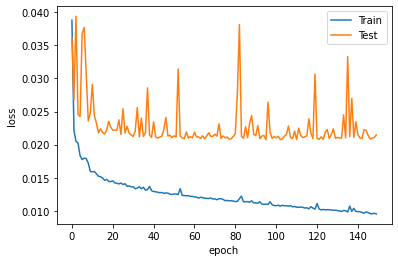

In [148]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()